# 11. Dimension Reduction

**데이터 불러오기**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

data = iris.data
feature_names = iris.feature_names

target = iris.target
target_names = iris.target_names

In [13]:
import pandas as pd

iris_df = pd.DataFrame(
    data=data,
    columns = feature_names
)

iris_df['target'] = target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PCA (Principal Component Analysis)
- 차원 축소의 방법 중 하나로, 주성분 분석을 의미한다.
- 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원의 데이터를 찾아내는 방법이다.
- (선형대수 관점에서) 입력 데이터의 공분산 행렬을 고윳값 분해하고, 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.
  - 정방행렬 => 고윳값 분해
  - 특이값^2 = 고윳값
  - 고윳값은 고유벡터의 크기로, 입력 데이터의 분산을 나타낸다.
  - 고유벡터는 PCA의 주성분 벡터로, 입력 데이터의 분산이 큰 방향을 나타낸다.


### 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

**꽃받침과 꽃잎을 따로 시각화**

In [5]:
sepal_columns = [feature_names[0], feature_names[1]]
petal_columns = [feature_names[2], feature_names[3]]

sepal_columns, petal_columns

(['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)'])

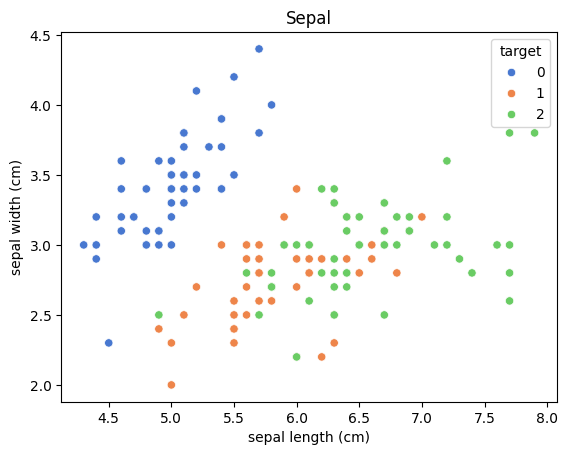

In [6]:
# 꽃받침
sns.scatterplot(
    x = sepal_columns[0],
    y = sepal_columns[1],
    hue='target',
    palette='muted',
    data=iris_df
)

plt.title('Sepal')
plt.show()

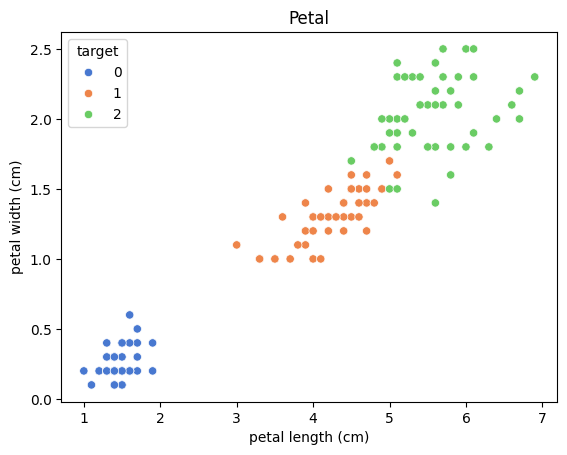

In [7]:
# 꽃
sns.scatterplot(
    x = petal_columns[0],
    y = petal_columns[1],
    hue='target',
    palette='muted',
    data=iris_df
)

plt.title('Petal')
plt.show()

### PCA 차원 변환

In [19]:
# 꽃받침과 꽃잎 데이터 컬럼 각각 2개로, 총 4개의 데이터를 가진 4차원 형태를 2차원으로 축소
#   n_components => 축소할 차원, 즉 분산이 가장 큰 벡터의 개수 (주성분 개수)
#   fit => PCA 객체에 데이터 입력
#          PCA에서 fit은 입려간 데이터 매트릭스의 공분산 행렬(AT @ A)을 만든다.
#          고윳값 분해까지 진행하며, 분산이 가장 큰 두 개의 주성분을 구한다.
#   transform => 데이터 변환 수행
#   .fit_transform으로 한번에 데이터 훈련 ~ 변환까지 수행 가능

from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_2.fit(iris_df.drop('target', axis=1))

iris_pca = pca_2.transform(iris_df.drop('target', axis=1))

iris_df.shape, iris_pca.shape

((150, 5), (150, 2))

In [11]:
# 2차원으로 변환된 데이터를 데이터프레임으로 만든다

pca_columns = ['Component 1', 'Component 2']

iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)

iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


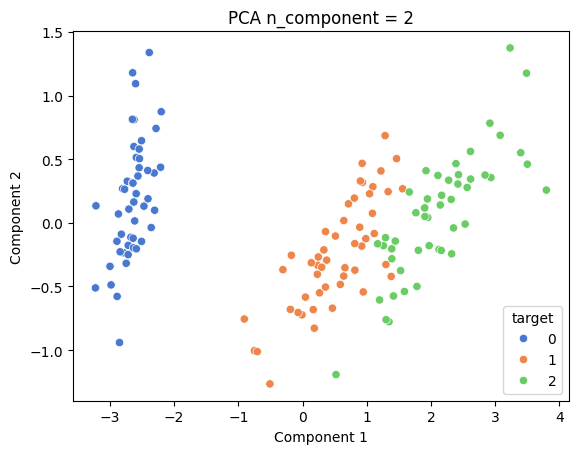

In [16]:
# 2차원 데이터 시각화

sns.scatterplot(
    x='Component 1',
    y='Component 2',
    hue='target',
    palette='muted',
    data=iris_pca_df
)

plt.title('PCA n_component = 2')
plt.show()

In [17]:
# 4차원을 다시 3차원으로 축소해보기
#   target 값은 3차원 데이터 안에 포함되지 않고, 범례로 활용할 예정이라 fit_transform에서 제외
#   3차원 축소 후 다시 target 컬럼 추가해야 한다.

pca_3 = PCA(n_components=3)

iris_pca_3 = pca_3.fit_transform(iris_df.drop('target', axis=1))
iris_pca_3.shape

(150, 3)

In [20]:
# 변환된 3차원 데이터를 데이터프레임으로 만들기

pca_columns = ['Component 1', 'Component 2', 'Component 3']
iris_pca_df = pd.DataFrame(
    iris_pca_3,
    columns=pca_columns
)

iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


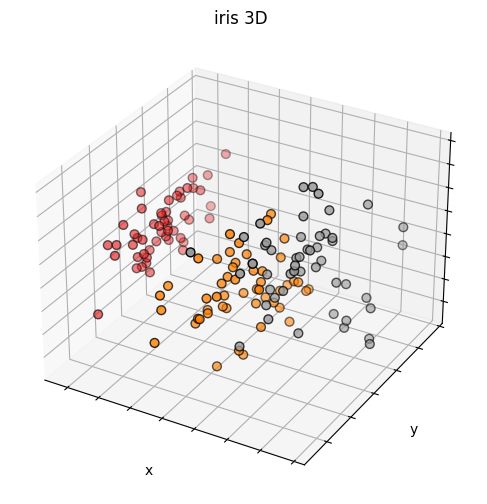

In [23]:
# 3차원 시각화를 위해 필요한 모듈 불러오기
#   c => 3D scatter의 색깔 기준
#   w_xaxis.set_ticklabels([]) => x축 tick 사용하지 않기

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_df['Component 1'],
           iris_pca_df['Component 2'],
           iris_pca_df['Component 3'],
           c=iris_pca_df['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title('iris 3D')
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([])

plt.show()

### PCA를 수행한 후 지도학습 모델 만들기

**(지도학습 모델과 비교할) 원본 데이터의 정확도**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr_clf = LogisticRegression()

scores = cross_val_score(
    lr_clf,             # 사용할 회귀모델
    iris.data,          # X
    iris.target,        # y
    scoring='accuracy', # 예측 성능 평가 방법
    cv=3                # 폴드의 개수
)

print('원본 데이터의 정확도: {:.3f}'.format(np.mean(scores)))

원본 데이터의 정확도: 0.973


**지도학습 모델의 정확도**
- 차원축소 => 데이터프레임 생성 => 지도학습 모델 => 교차검증으로 정확도 산출까지

In [31]:
# iris_pca_df 데이터프레임은 위에서 2차원 축소 후 다시 3차원으로 생성할 때 덮어썼으므로
#   다시 차원축소부터 데이터프레임 생성까지 진행한다.

from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
iris_pca_2 = pca_2.fit_transform(iris_df.drop('target', axis=1))

pca_2_columns = ['Component 1', 'Component 2']
iris_pca_2_df = pd.DataFrame(
    iris_pca_2,
    columns = pca_2_columns
)

iris_pca_2_df['target'] = target
iris_pca_2_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [34]:
# 지도학습 모델 ~ 예측 성능 평가까지

lr_reg = LogisticRegression()

pca_X = iris_pca_df[['Component 1', 'Component 2']]

scores_pca = cross_val_score(
    lr_reg,
    pca_X,
    iris_pca_2_df['target'],
    scoring='accuracy',
    cv=3
)

print('PCA 변환 후 평균 정확도: {:.3f}'.format(np.mean(scores_pca)))

PCA 변환 후 평균 정확도: 0.960


## LDA (Linear Discriminant Analysis)
- 선형 판별 분석법
- PCA와 매우 유사한 기법이다.
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서, 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이다.
  - Classification 전용 방법이다.
  - 따라서 반드시 target이 필요하다.
- 입력 데이터의 클래스 분리를 최대화시키는 축을 찾는다.
  - 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 한다.
  - 같은 클래스의 데이터는 최대한 가깝게, 다른 클래스의 데이터는 최대한 멀리 떨어뜨리는 축으로 매핑한다.

In [35]:
# n_components => 축소할 차원, 즉 클래스를 가장 잘 판별(분류)할 수 있는 축의 개수

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

In [36]:
# PCA와 달리 X, y를 같이 입력한다.

lda.fit(iris.data, iris.target)

LinearDiscriminantAnalysis(n_components=2)

In [37]:
iris_lda = lda.transform(iris.data)
iris_lda.shape

(150, 2)

### 시각화

In [38]:
iris_lda_df = pd.DataFrame(
    data=iris_lda,
    columns=['c1', 'c2']
)

iris_lda_df['target'] = target
iris_lda_df.head()

,c1,c2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


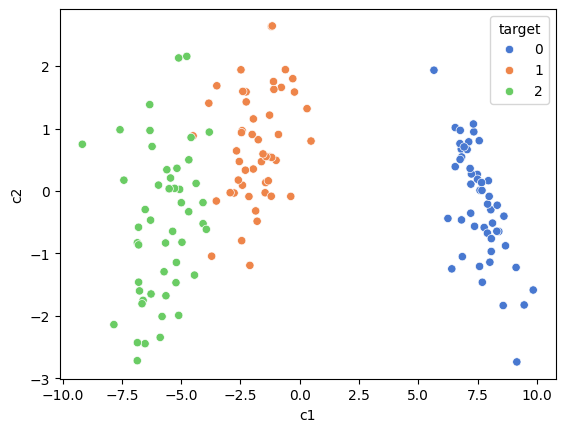

In [39]:
sns.scatterplot(
    x='c1',
    y='c2',
    hue='target',
    palette='muted',
    data=iris_lda_df
)

plt.show()

## SVD (Singular Value Decomposition)
- 특잇값 분해로도 차원축소가 가능하다.
- 고유분해는 정방행렬에 대해서만 분해가 가능하지만, 특잇값 분해는 행과 열의 크기가 다른 행렬도 분해가 가능하다.

In [42]:
# n_components => 상위 2개의 특잇값만 사용!
#   iris_svd => 원본 데이터를 최대한 잘 표현할 수 있는 상위 2개의 특이벡터에 투영된 데이터

from sklearn.decomposition import TruncatedSVD

t_svd = TruncatedSVD(n_components=2)
iris_svd = t_svd.fit_transform(iris.data)
iris_svd.shape

(150, 2)

In [44]:
iris_svd_df = pd.DataFrame(
    data=iris_svd,
    columns=['columns1', 'columns2']  # 컬럼에 적용할 이름 설정
)

iris_svd_df['target'] = target
iris_svd_df.head()

,columns1,columns2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


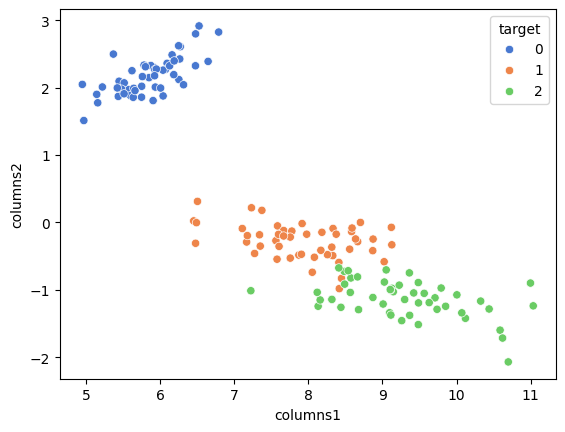

In [45]:
sns.scatterplot(
    x='columns1',
    y='columns2',
    hue='target',
    palette='muted',
    data=iris_svd_df
)

plt.show()

Text(0.5, 1.0, 'PCA Transformed')

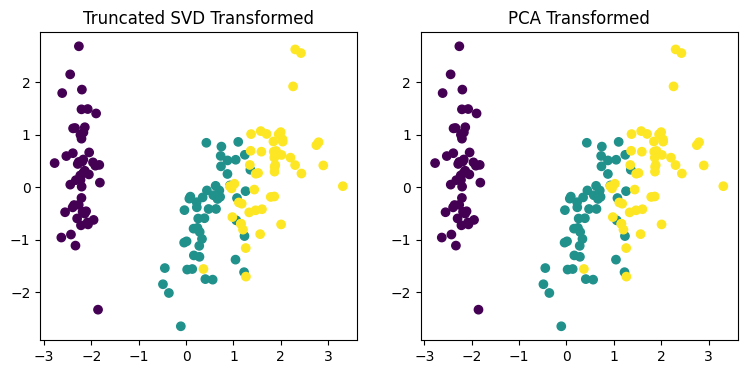

In [48]:
# 원본 데이터를 표준화시킨 후 SVD와 PCA 수행, 하나의 plot 안에 동시 표현
#   모델 생성 => 훈련 & 변환
#   c => 색깔 기준

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_scaled)

# PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

# 시각화
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')